# Hands-on ML-Chapter 03 -Exercise 01-Solution

In [2]:
from sklearn.datasets import fetch_openml

In [57]:
import pandas as pd

In [100]:
import numpy as np

In [105]:
import matplotlib.pyplot as plt

In [3]:
mnist=fetch_openml('mnist_784',version=1)

In [6]:
type(mnist)

sklearn.utils.Bunch

In [7]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [9]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [14]:
mnist["data"].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
mnist["target"].head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [25]:
X=mnist["data"].values

In [26]:
y=mnist["target"].values

In [27]:
#Train,Test split
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [28]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
kn_clf=KNeighborsClassifier()

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid={"n_neighbors":[1,3,5,8,10],"weights":['uniform','distance']}

In [41]:
grid_search=GridSearchCV(kn_clf,param_grid,scoring='accuracy',cv=3,verbose=3)

In [42]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END .................n_neighbors=1, weights=uniform; total time=  22.7s
[CV 2/3] END .................n_neighbors=1, weights=uniform; total time=  24.4s
[CV 3/3] END .................n_neighbors=1, weights=uniform; total time=  23.5s
[CV 1/3] END ................n_neighbors=1, weights=distance; total time=  23.4s
[CV 2/3] END ................n_neighbors=1, weights=distance; total time=  23.7s
[CV 3/3] END ................n_neighbors=1, weights=distance; total time=  25.6s
[CV 1/3] END .................n_neighbors=3, weights=uniform; total time=  28.5s
[CV 2/3] END .................n_neighbors=3, weights=uniform; total time=  26.5s
[CV 3/3] END .................n_neighbors=3, weights=uniform; total time=  30.0s
[CV 1/3] END ................n_neighbors=3, weights=distance; total time=  26.3s
[CV 2/3] END ................n_neighbors=3, weights=distance; total time=  25.9s
[CV 3/3] END ................n_neighbors=3, weig

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 8, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [58]:
grid_search_results=pd.DataFrame(grid_search.cv_results_)

In [59]:
grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.326441,0.021354,23.211378,0.719631,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.96875,0.96685,0.96705,0.967550,0.000852,4
1,0.313229,0.008882,23.912109,0.944776,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.96875,0.96685,0.96705,0.967550,0.000852,4
2,0.319730,0.021425,28.011110,1.418575,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.96900,0.96805,0.96750,0.968183,0.000620,3
3,0.299478,0.019715,26.057141,0.393373,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.97040,0.96890,0.96870,0.969333,0.000759,1
4,0.414535,0.158506,31.198106,0.664201,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.96760,0.96710,0.96755,0.967417,0.000225,6
5,0.282750,0.004676,27.647697,0.294333,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.96880,0.96795,0.96905,0.968600,0.000471,2
6,0.286090,0.004970,27.719468,0.134826,8,uniform,"{'n_neighbors': 8, 'weights': 'uniform'}",0.96365,0.96370,0.96570,0.964350,0.000955,9
7,0.298160,0.006667,27.608387,0.401405,8,distance,"{'n_neighbors': 8, 'weights': 'distance'}",0.96715,0.96620,0.96845,0.967267,0.000922,7
8,0.283945,0.004099,28.594126,0.619571,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.96210,0.96200,0.96450,0.962867,0.001156,10
9,0.291288,0.001453,29.282429,0.995831,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.96435,0.96435,0.96635,0.965017,0.000943,8


In [60]:
#best estimator
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [61]:
#best score
grid_search.best_score_

0.9693333333333333

In [62]:
#best params
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [74]:
final_model=grid_search.best_estimator_

In [75]:
y_predict=final_model.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix

In [93]:
conf_max=confusion_matrix(y_test,y_predict)

In [94]:
conf_max

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   9,    7,  997,    2,    0,    0,    1,   14,    2,    0],
       [   0,    1,    4,  975,    1,   13,    1,    7,    4,    4],
       [   0,    5,    0,    0,  948,    0,    5,    4,    1,   19],
       [   4,    1,    0,   12,    2,  860,    5,    1,    3,    4],
       [   4,    3,    0,    0,    4,    3,  944,    0,    0,    0],
       [   0,   18,    4,    0,    2,    0,    0,  994,    0,   10],
       [   7,    0,    3,   13,    5,   11,    3,    4,  923,    5],
       [   3,    4,    2,    7,    9,    4,    1,    8,    2,  969]])

In [79]:
from sklearn.metrics import plot_confusion_matrix

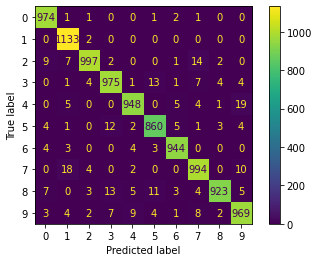

In [81]:
plot_confusion_matrix(final_model,X_test,y_test)

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(y_test,y_predict)

0.9717

In [95]:
row_sum=conf_max.sum(axis=1)

In [96]:
row_sum

array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])

In [98]:
norm_conf_mx=conf_max/row_sum

In [108]:
np.fill_diagonal(norm_conf_mx,0)

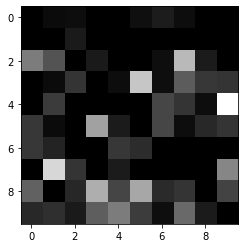

In [110]:
plt.imshow(norm_conf_mx,cmap=plt.cm.gray)

# Inference


* Digits 0,1,6 are pretty much classified correctly
* Digit 2 often misclassified as 7 
* Digit 3 often misclassified as 5
* Digit 4 often misclassified as 9 
* Digit 5 often misclassified as 3
* Digit 7 often misclassified as 1
* Digit 8 often misclassified as 3 and 5
* Digit 9 often misclassified as 4 and 7